In [1]:
import sys
sys.path.insert(0, '..')
import utils.game_utils as gu

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

nfld = gu.NFL_Data()
nfl_df = nfld.data()
nfl_df.head()

,date,year,week,team,team_score,opponent,opponent_score,win,home,overtime,...,team_total_yards_cml_before,opponent_total_yards_cml_before,team_rush_yards_cml_after,opponent_rush_yards_cml_after,team_pass_yards_cml_after,opponent_pass_yards_cml_after,team_total_yards_cml_after,opponent_total_yards_cml_after,team_opp_trn,opponent_opp_trn
0,2010-09-09,2010,1,New Orleans Saints,14,Minnesota Vikings,9,1,1,0,...,0,0,79,91,237,171,308,253,0.5,0.5
1,2010-09-09,2010,1,Minnesota Vikings,9,New Orleans Saints,14,0,0,0,...,0,0,91,79,171,237,253,308,0.5,0.5
2,2010-09-12,2010,1,Chicago Bears,19,Detroit Lions,14,1,1,0,...,0,0,101,20,372,171,463,168,0.5,0.5
3,2010-09-12,2010,1,Detroit Lions,14,Chicago Bears,19,0,0,0,...,0,0,20,101,171,372,168,463,0.5,0.5
4,2010-09-12,2010,1,Buffalo Bills,10,Miami Dolphins,15,0,1,0,...,0,0,50,132,139,182,166,296,0.5,0.5


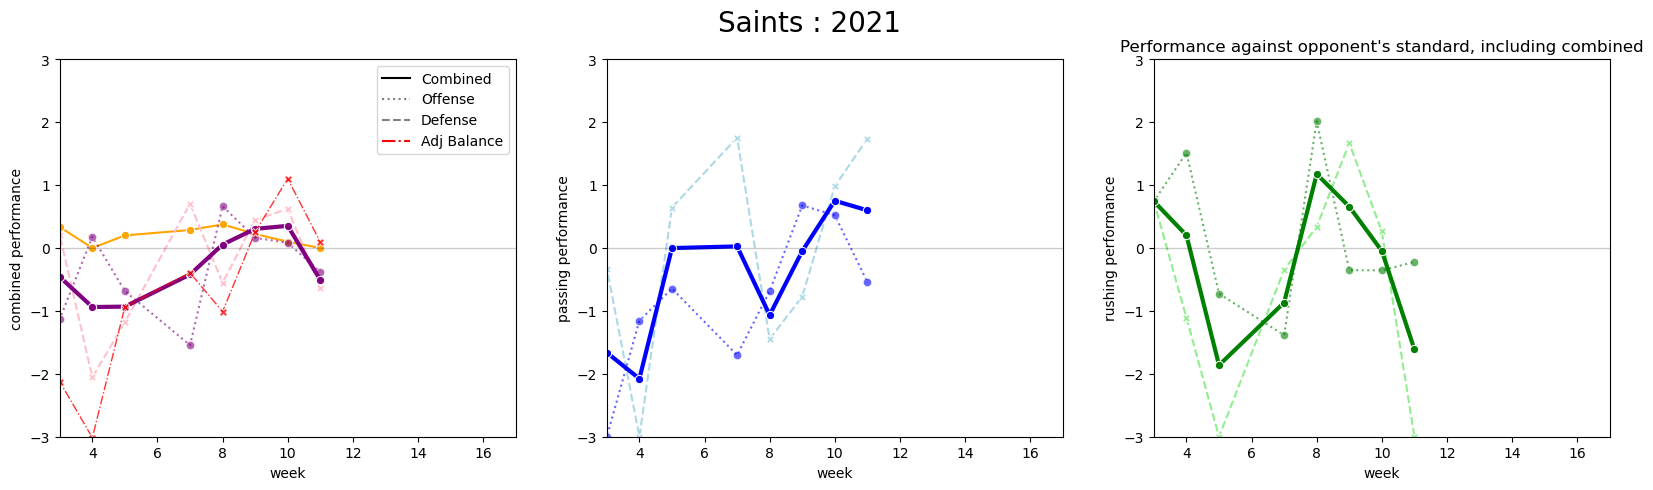

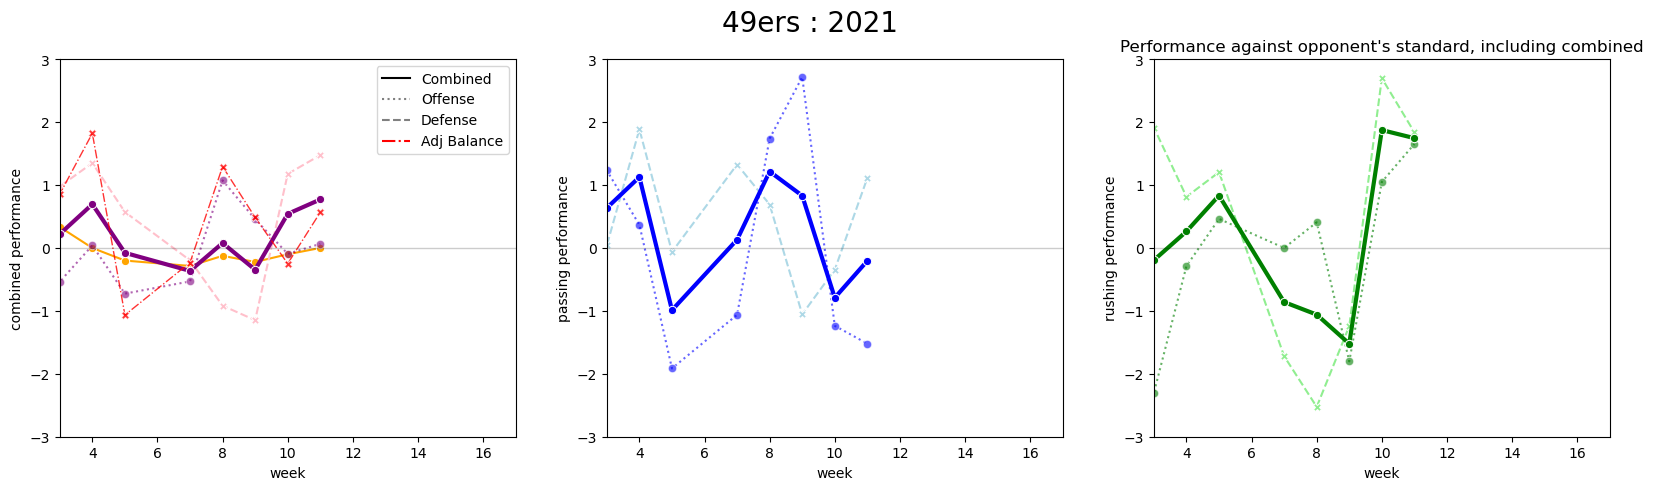

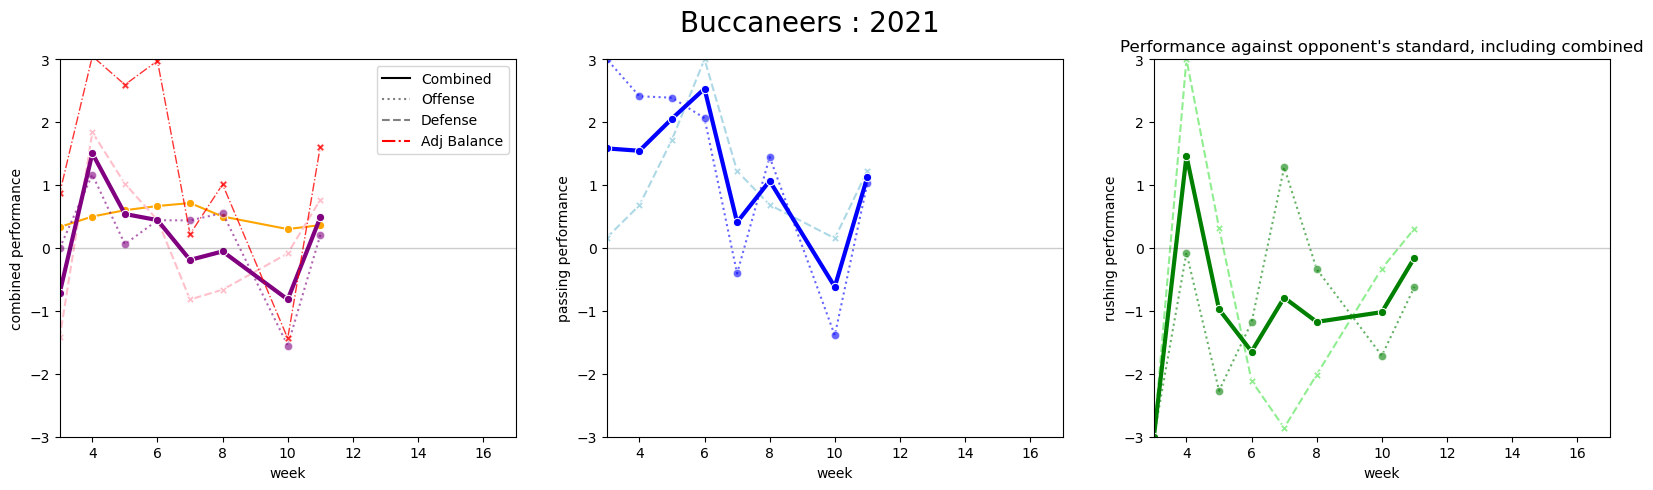

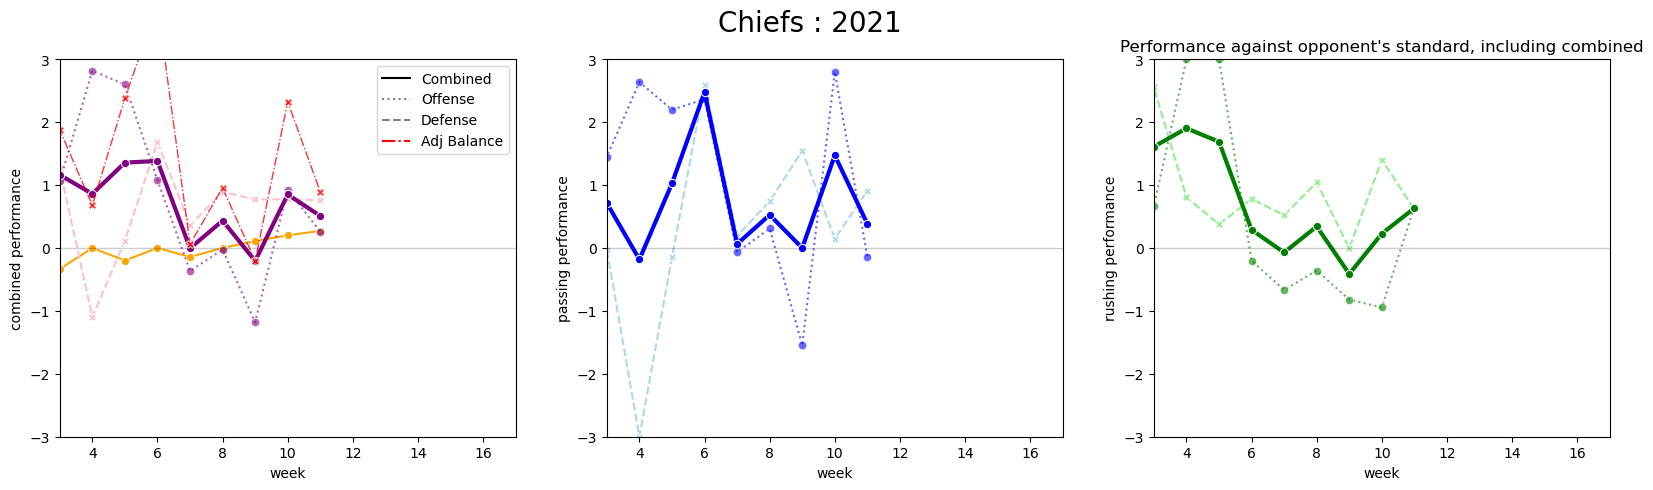

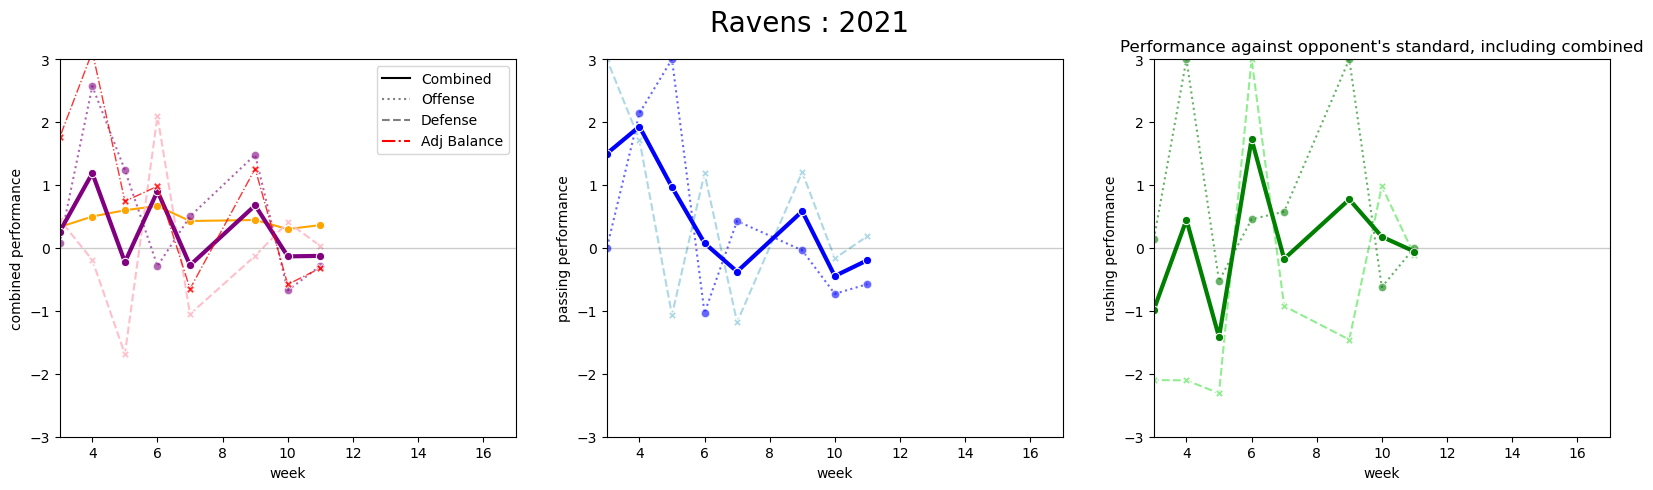

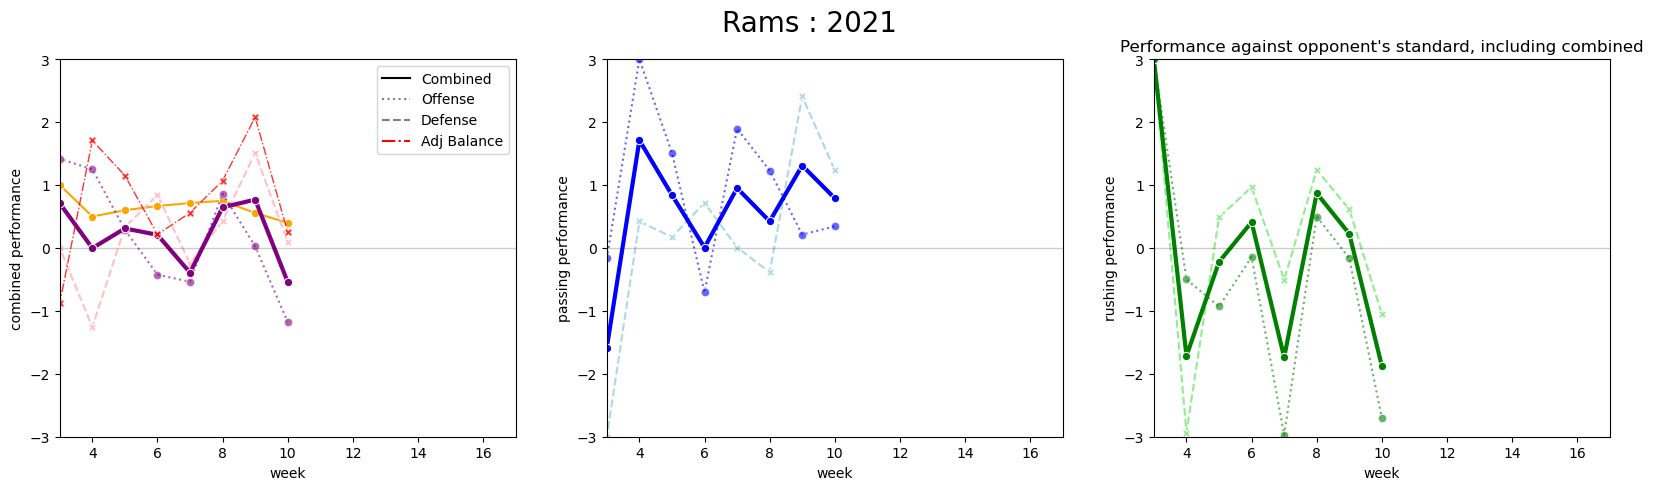

In [151]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

def plot_compare(nickname, year_df, pass_to_rush_weight=1.0):
  year = year_df['year'].values[0]
  tdf = year_df[year_df['team'] == gu.TEAM_NAME[nickname]]
  rec_df = tdf[['team_record_normal_after', 'week']].copy()
  rec_df['trn_adjusted'] = tdf[['team_record_normal_after']] * 2 - 1
  
  fig, axs = plt.subplots(ncols=3, figsize=(20,5),dpi=100)
  
  plt.title("Performance against opponent's standard, including combined")
  plt.suptitle(f'{nickname} : {year}', fontsize=20)
  
  indv_line_alpha = 0.6
  comb_line_width = 3
  
  # OVERALL
  sns.lineplot(ax=axs[0], data=rec_df, x='week', y=f'trn_adjusted', color='orange', marker='o')
  sns.lineplot(ax=axs[0], data=tdf, x='week', y=f'team_week_comb_def_perf', linestyle='--', marker='X', color='pink')
  sns.lineplot(ax=axs[0], data=tdf, x='week', y=f'team_week_comb_off_perf', linestyle=':', marker='o', color='purple', alpha=indv_line_alpha)
  sns.lineplot(ax=axs[0], data=tdf, x='week', y=f'team_week_comb_comp_perf', marker='o', color='purple', linewidth=comb_line_width)
  # overall adjusted
  # is rushing as important as passing? This allows for an adjustment
  if pass_to_rush_weight != 1.0:
    perf_over_df = tdf[['team_week_rush_comp_perf', 'team_week_pass_comp_perf', 'week']].copy()
    perf_over_df['adj__week_overall_perf'] = (tdf['team_week_rush_comp_perf'] + tdf['team_week_pass_comp_perf'] * pass_to_rush_weight) / 2
    sns.lineplot(ax=axs[0], data=perf_over_df, x='week', y=f'adj__week_overall_perf', linestyle='-.', marker='X', color='red', linewidth=1, alpha=0.8)

  sns.lineplot(ax=axs[1], data=tdf, x='week', y=f'team_week_pass_def_perf', linestyle='--', marker='X', color='lightblue')
  sns.lineplot(ax=axs[1], data=tdf, x='week', y=f'team_week_pass_off_perf', linestyle=':', marker='o', color='blue', alpha=indv_line_alpha)
  sns.lineplot(ax=axs[1], data=tdf, x='week', y=f'team_week_pass_comp_perf', marker='o', color='blue', linewidth=comb_line_width)

  sns.lineplot(ax=axs[2], data=tdf, x='week', y=f'team_week_rush_def_perf', linestyle='--', marker='X', color='lightgreen')
  sns.lineplot(ax=axs[2], data=tdf, x='week', y=f'team_week_rush_off_perf', linestyle=':', marker='o', color='green', alpha=indv_line_alpha)
  sns.lineplot(ax=axs[2], data=tdf, x='week', y=f'team_week_rush_comp_perf', marker='o', color='green', linewidth=comb_line_width)
  
  # 0-lines
  axs[0].axhline(y=0, lw=1, color='black', alpha=0.2)
  axs[1].axhline(y=0, lw=1, color='black', alpha=0.2)
  axs[2].axhline(y=0, lw=1, color='black', alpha=0.2)
  
  # limit the windows
  axs[0].set_xlim(3,17)
  axs[1].set_xlim(3,17)
  axs[2].set_xlim(3,17)
  axs[0].set_ylim(-3,3)
  axs[1].set_ylim(-3,3)
  axs[2].set_ylim(-3,3)
  
  axs[0].set_ylabel("combined performance")
  axs[1].set_ylabel("passing performance")
  axs[2].set_ylabel("rushing performance")
  
  red_line = mlines.Line2D([], [], color='red', linestyle='-.', label='Adj Balance')
  off_line = mlines.Line2D([], [], color='gray', linestyle=':', label='Offense')
  def_line = mlines.Line2D([], [], color='gray', linestyle='--', label='Defense')
  comb_line = mlines.Line2D([], [], color='black', linestyle='-', label='Combined')
  # red_patch = mpatches.Patch(color='red', label='The red data')
  axs[0].legend(handles=[comb_line, off_line, def_line, red_line])

 
teams = [
         'Saints',
         '49ers',
         'Buccaneers',
        #  'Patriots',
         'Chiefs',
        #  'Steelers',
         'Ravens',
         'Rams',
        #  'Jets',
        #  'Texans',
        #  'Giants',
        ]

year_df = nfld.year(2021)
for team in teams:
  plot_compare(team, year_df, pass_to_rush_weight=3)

90 won with more points
165 total games
0.55 more-point win ratio
54.42% mean percentage
4.42% return on season-long across the board bet


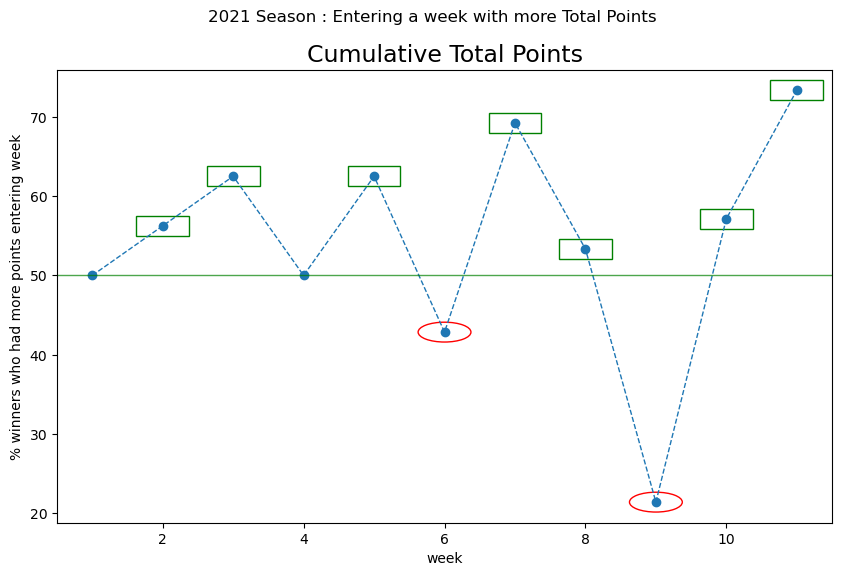

In [141]:
import matplotlib.patches as mpatches


year_df = nfld.year(2021)
home_df = year_df[year_df['home'] == 1]

total_wins_tally = 0
week_percs = []
year = home_df['year'].values[0]
max_week = home_df['week'].max()

def get_win_with_more_points_per_for_week(week):
  week_df = home_df[home_df['week'] == week]
  game_count = len(week_df)
  wins_with_more_points = len(week_df[(
      (week_df['win'] == 1)&(week_df['team_points_cml_before'] > week_df['opponent_points_cml_before']) |
      (week_df['win'] == 0)&(week_df['team_points_cml_before'] <= week_df['opponent_points_cml_before'])
    )])
  
  return (wins_with_more_points / game_count * 100, wins_with_more_points)

for i in np.arange(1,max_week + 1):
  (perc, wins_with_more_points) = get_win_with_more_points_per_for_week(i)  
  total_wins_tally += wins_with_more_points
  week_percs.append(perc)
  
fig = plt.figure(figsize=(10,6),dpi=100)
ax = fig.gca()

plt.plot(np.arange(1,max_week + 1), week_percs, '--o', lw=1);
plt.axhline(y=50, lw=1, color='green', alpha=0.7)
plt.xlabel('week')
plt.ylabel('% winners who had more points entering week')

# add winner identifiers

for i in np.arange(1,len(week_percs)):
  perc = week_percs[i]
  pos = (i+1, perc)
  w = 0.75
  h = 2.5
  if perc > 50:
    ax.add_patch(plt.Rectangle(xy=(i+1 - (w/2), perc - (h/2)), width=w, height=h, fill=False, color='g'))
  elif perc < 50:
    ax.add_patch(mpatches.Ellipse(xy=(i+1, perc), width=w, height=h, fill=False, color='r'))

plt.title('Cumulative Total Points', fontsize=17)
plt.suptitle(f'{year} Season : Entering a week with more Total Points')

# np.sum(week_percs)
perc_df = pd.Series(week_percs)
# (perc_df - 50).sum()
print(f'{total_wins_tally} won with more points')
print(f'{len(home_df)} total games')
print(f'{total_wins_tally/len(home_df):.2f} more-point win ratio')
print(f'{np.asarray(week_percs).mean():.2f}% mean percentage')
print(f'{np.asarray(week_percs).mean() - 50:.2f}% return on season-long across the board bet')



Text(0.5, 0.98, 'Is being at home a predictor of victory? : 2010-2021')

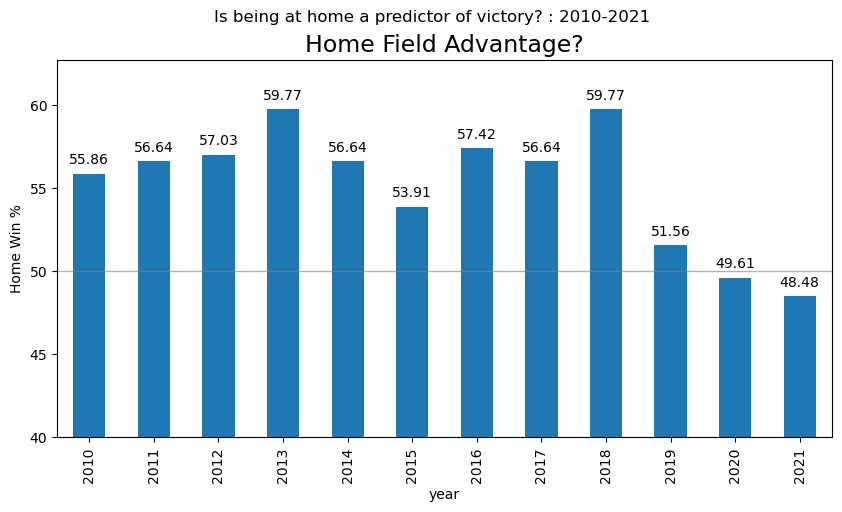

In [138]:
nfl_df = nfld.data_by_game()
samp_df = nfl_df[['year', 'win']]
win_perc_year_df = samp_df.groupby('year').sum() / samp_df.groupby('year').count() * 100
win_perc_year_df

fig, ax = plt.subplots(figsize=(10,5),dpi=100)
win_perc_year_df.plot(kind='bar', ax=ax, legend=None)

for p in ax.patches:                 
  ax.annotate(np.round(p.get_height(),decimals=2), 
              (p.get_x()+p.get_width()/2., p.get_height()),                              
              ha='center',                              
              va='center',                              
              xytext=(0, 10),                               
              textcoords='offset points')
  
plt.axhline(y=50, color='gray', linestyle='-', lw=1, alpha=0.6)
plt.ylim(bottom=40)
plt.ylabel('Home Win %');
plt.title('Home Field Advantage?', fontsize=17)
plt.suptitle('Is being at home a predictor of victory? : 2010-2021')

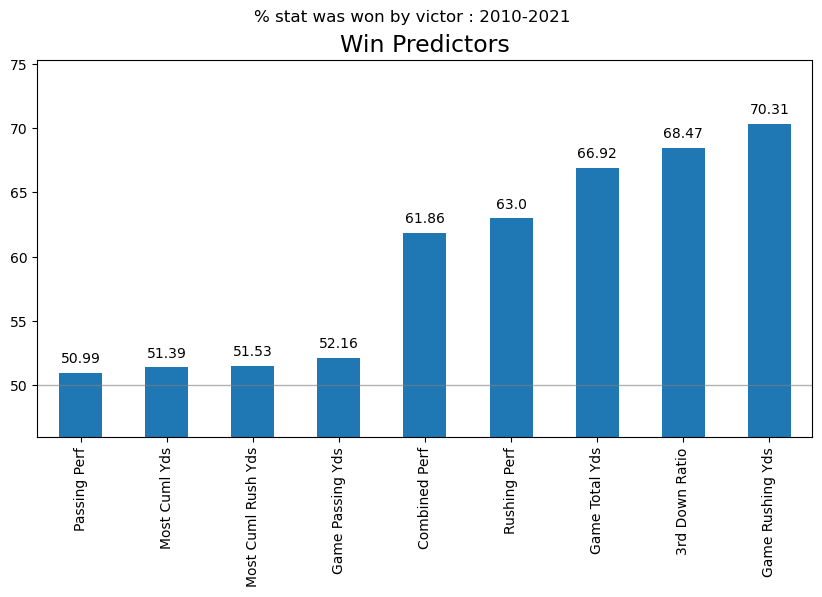

In [137]:

def add_did_gt_win(df, new_fieldname, root_test_field_name):
  df[new_fieldname] = ((df['win']) & (df[f'team_{root_test_field_name}'] > df[f'opponent_{root_test_field_name}'])) | ((df['win'] == 0) & (df[f'team_{root_test_field_name}'] <= df[f'opponent_{root_test_field_name}']))

df = nfld.data_by_game().copy()

conf_list = [
  ('top_pass_won', 'pass_yards', 'Game Passing Yds'),
  ('top_rush_won', 'rush_yards', 'Game Rushing Yds'),
  ('top_total_won', 'total_yards', 'Game Total Yds'),
  ('top_rush_cml_b4_won', 'rush_yards_cml_before', 'Most Cuml Rush Yds'),
  ('top_total_cml_b4_won', 'total_yards_cml_before', 'Most Cuml Yds'),
  ('top_total_pass_comp_perf_won', 'week_pass_comp_perf', 'Passing Perf'),
  ('top_total_rush_comp_perf_won', 'week_rush_comp_perf', 'Rushing Perf'),
  ('top_total_comb_comp_perf_won', 'week_comb_comp_perf', 'Combined Perf'),
  ('top_third_dwn_ratio_won', 'third_down_ratio', '3rd Down Ratio'),
]

columns = []
fields = []
for conf_item in conf_list:
  new_fieldname, root_test_field_name, col_label = conf_item
  add_did_gt_win(df, new_fieldname, root_test_field_name)
  columns.append(col_label)
  fields.append(new_fieldname)

data_df = df[['year'] + fields]

### NOW PLOT
count = len(data_df)

c_data = data_df.drop('year', axis=1)
c_data.columns = columns
c_data = (c_data.sum() / count * 100).sort_values()

mmin = c_data.min() - 5
mmax = c_data.max() + 5

fig, ax = plt.subplots(figsize=(10,5),dpi=100)
c_data.plot(kind="bar")
plt.ylim(mmin,mmax)
plt.axhline(y=50, color='gray', linestyle='-', lw=1, alpha=0.6)
plt.title('Win Predictors', fontsize=17)
plt.suptitle('% stat was won by victor : 2010-2021')

for p in ax.patches:                 
  ax.annotate(np.round(p.get_height(),decimals=2), 
              (p.get_x()+p.get_width()/2., p.get_height()),                              
              ha='center',                              
              va='center',                              
              xytext=(0, 10),                               
              textcoords='offset points')


In [107]:
c_data.sort_values()

Passing Perf          50.989601
Most Cuml Yds         51.392150
Most Cuml Rush Yds    51.526333
Game Passing Yds      52.163703
Combined Perf         61.858437
Rushing Perf          62.998994
Game Total Yds        66.923851
3rd Down Ratio        68.466957
Game Rushing Yds      70.311976
dtype: float64

In [135]:
### was attempting groupby year


# def add_did_gt_win(df, new_fieldname, root_test_field_name):
#   df[new_fieldname] = ((df['win']) & (df[f'team_{root_test_field_name}'] > df[f'opponent_{root_test_field_name}'])) | ((df['win'] == 0) & (df[f'team_{root_test_field_name}'] <= df[f'opponent_{root_test_field_name}']))

# df = nfld.data_by_game().copy()

# conf_list = [
#   ('top_pass_won', 'pass_yards', 'Game Passing Yds'),
#   ('top_rush_won', 'rush_yards', 'Game Rushing Yds'),
#   ('top_total_won', 'total_yards', 'Game Total Yds'),
#   ('top_rush_cml_b4_won', 'rush_yards_cml_before', 'Most Cuml Rush Yds'),
#   ('top_total_cml_b4_won', 'total_yards_cml_before', 'Most Cuml Yds'),
#   ('top_total_pass_comp_perf_won', 'week_pass_comp_perf', 'Passing Perf'),
#   ('top_total_rush_comp_perf_won', 'week_rush_comp_perf', 'Rushing Perf'),
#   ('top_total_comb_comp_perf_won', 'week_comb_comp_perf', 'Combined Perf'),
#   ('top_third_dwn_ratio_won', 'third_down_ratio', '3rd Down Ratio'),
# ]

# columns = []
# fields = []
# for conf_item in conf_list:
#   new_fieldname, root_test_field_name, col_label = conf_item
#   add_did_gt_win(df, new_fieldname, root_test_field_name)
#   columns.append(col_label)
#   fields.append(new_fieldname)

# data_df = df[['year'] + fields]
# do = data_df
# data_df = data_df.groupby('year').sum()


# ### NOW PLOT
# count = len(data_df)

# # c_data = data_df.drop('year', axis=1)
# c_data = data_df
# c_data.columns = columns
# c_data = (c_data.sum() / count * 100)

# mmin = c_data.min() - 5
# mmax = c_data.max() + 5

# plt.figure(figsize=(10,5),dpi=100)
# c_data.plot(kind="bar")
# plt.ylim(mmin,mmax)
# plt.axhline(y=50, color='gray', linestyle='-', lw=1, alpha=0.6)
# plt.title('Win Predictors', fontsize=17)
# plt.suptitle('% stat was won by victor : 2010-2021')
